In [10]:
from preprocessor import Preprocessor
from sklearn.preprocessing import LabelEncoder
from constants import PG_LOG_DTYPES

import glob
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [11]:
parquet = r'./preprocessed.parquet.gzip'
preprocessor = Preprocessor(parquet_path=parquet)
df = preprocessor.get_dataframe()
empties = df['query_template'] == ''
print(f"Removing {sum(empties)} empty query template values.")
df = df[:][~empties]
df.shape

Removing 38 empty query template values.


(759272, 5)

# Ridgeplots?

In [12]:
import joypy

In [13]:
i = 0
for qt, gdf in df.groupby('query_template'):
  print(qt)
  i += 1
  if i == 5:
    break

BEGIN
COMMIT
DELETE FROM new_order WHERE NO_O_ID = $1 AND NO_D_ID = $2 AND NO_W_ID = $3
INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_ID, H_D_ID, H_W_ID, H_DATE, H_AMOUNT, H_DATA) VALUES ($1,$2,$3,$4,$5,$6,$7,$8)
INSERT INTO new_order (NO_O_ID, NO_D_ID, NO_W_ID) VALUES ( $1, $2, $3)


In [14]:
groups = [(qt, gdf) for qt, gdf in df.groupby('query_template')]

selected_group = 3
query_template, gdf = groups[selected_group]
print(query_template)
display(gdf)

INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_ID, H_D_ID, H_W_ID, H_DATE, H_AMOUNT, H_DATA) VALUES ($1,$2,$3,$4,$5,$6,$7,$8)


,query_template,query_params,session_line_num,virtual_transaction_id,transaction_id
log_time,,,,,
2022-03-08 11:29:38.161000-05:00,"INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_I...","('6', '1', '2452', '6', '1', '2022-03-08 11:29...",479848,3/16685,56553
2022-03-08 11:29:38.166000-05:00,"INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_I...","('1', '1', '351', '7', '1', '2022-03-08 11:29:...",479893,3/16687,56555
2022-03-08 11:29:38.186000-05:00,"INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_I...","('7', '1', '1739', '7', '1', '2022-03-08 11:29...",480212,3/16696,56562
2022-03-08 11:29:38.203000-05:00,"INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_I...","('3', '1', '731', '3', '1', '2022-03-08 11:29:...",480465,3/16701,56567
2022-03-08 11:29:38.204000-05:00,"INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_I...","('4', '1', '167', '4', '1', '2022-03-08 11:29:...",480474,3/16702,56568
...,...,...,...,...,...
2022-03-08 11:29:41.846000-05:00,"INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_I...","('7', '1', '1314', '6', '1', '2022-03-08 11:29...",529393,3/18396,58128
2022-03-08 11:29:41.850000-05:00,"INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_I...","('7', '1', '720', '7', '1', '2022-03-08 11:29:...",529430,3/18398,58130
2022-03-08 11:29:41.865000-05:00,"INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_I...","('8', '1', '959', '8', '1', '2022-03-08 11:29:...",529656,3/18404,58136


In [15]:
gdf['query_params'].apply(pd.Series)

,0,1,2,3,4,5,6,7
log_time,,,,,,,,
2022-03-08 11:29:38.161000-05:00,'6','1','2452','6','1','2022-03-08 11:29:38.161','4522.97998046875','xsolg weymtsxo'
2022-03-08 11:29:38.166000-05:00,'1','1','351','7','1','2022-03-08 11:29:38.165','4548.06982421875','xsolg stcrvmy'
2022-03-08 11:29:38.186000-05:00,'7','1','1739','7','1','2022-03-08 11:29:38.186','487.5400085449219','xsolg stcrvmy'
2022-03-08 11:29:38.203000-05:00,'3','1','731','3','1','2022-03-08 11:29:38.203','342.9100036621094','xsolg navoynfao'
2022-03-08 11:29:38.204000-05:00,'4','1','167','4','1','2022-03-08 11:29:38.204','3403.6298828125','xsolg qlzpplfl'
...,...,...,...,...,...,...,...,...
2022-03-08 11:29:41.846000-05:00,'7','1','1314','6','1','2022-03-08 11:29:41.846','3480.409912109375','xsolg weymtsxo'
2022-03-08 11:29:41.850000-05:00,'7','1','720','7','1','2022-03-08 11:29:41.85','3474.5400390625','xsolg stcrvmy'
2022-03-08 11:29:41.865000-05:00,'8','1','959','8','1','2022-03-08 11:29:41.865','4133.259765625','xsolg roeplql'


In [16]:
gdft = gdf['query_params'].apply(pd.Series)
gdft = gdft.apply(lambda col: col.str.slice(1, -1))

for col in gdft:
    try:
        gdft[col] = pd.to_datetime(gdft[col], errors='raise')
    except:
        try:
            gdft[col] = pd.to_numeric(gdft[col], errors='raise')
        except:
            pass
gdft = gdft.convert_dtypes()

print(gdft.dtypes)
display(gdft)


0             Int64
1             Int64
2             Int64
3             Int64
4             Int64
5    datetime64[ns]
6           Float64
7            string
dtype: object


,0,1,2,3,4,5,6,7
log_time,,,,,,,,
2022-03-08 11:29:38.161000-05:00,6,1,2452,6,1,2022-03-08 11:29:38.161,4522.97998,xsolg weymtsxo
2022-03-08 11:29:38.166000-05:00,1,1,351,7,1,2022-03-08 11:29:38.165,4548.069824,xsolg stcrvmy
2022-03-08 11:29:38.186000-05:00,7,1,1739,7,1,2022-03-08 11:29:38.186,487.540009,xsolg stcrvmy
2022-03-08 11:29:38.203000-05:00,3,1,731,3,1,2022-03-08 11:29:38.203,342.910004,xsolg navoynfao
2022-03-08 11:29:38.204000-05:00,4,1,167,4,1,2022-03-08 11:29:38.204,3403.629883,xsolg qlzpplfl
...,...,...,...,...,...,...,...,...
2022-03-08 11:29:41.846000-05:00,7,1,1314,6,1,2022-03-08 11:29:41.846,3480.409912,xsolg weymtsxo
2022-03-08 11:29:41.850000-05:00,7,1,720,7,1,2022-03-08 11:29:41.850,3474.540039,xsolg stcrvmy
2022-03-08 11:29:41.865000-05:00,8,1,959,8,1,2022-03-08 11:29:41.865,4133.259766,xsolg roeplql


Column 0


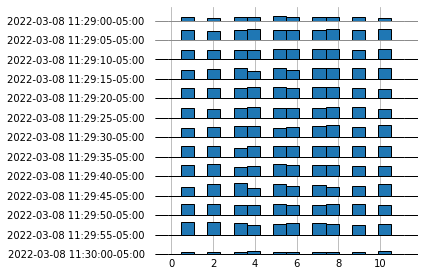

Column 1


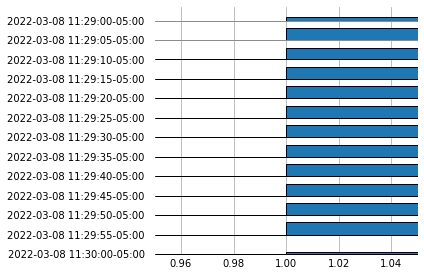

Column 2


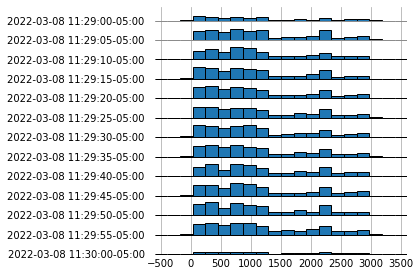

Column 3


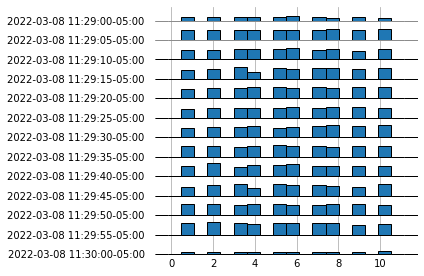

Column 4


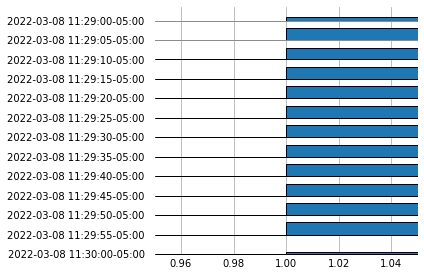

Column 5


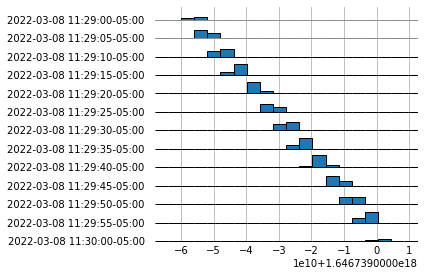

Column 6


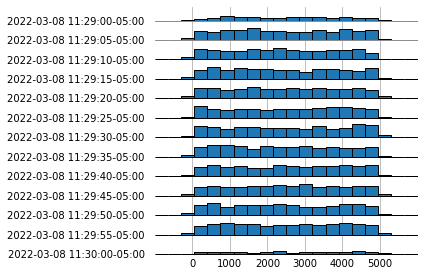

Column 7


In [18]:
from pandas.api.types import is_datetime64_any_dtype

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for col, dtype in zip(gdft, gdft.dtypes):
        print(f"Column {col}")
        
        if dtype in ['object', 'string']:
            continue
        
        if is_datetime64_any_dtype(dtype):
            gdft[col] = pd.to_numeric(gdft[col])
        meow = gdft[col].to_frame()
        joypy.joyplot(meow.groupby(pd.Grouper(freq="5s")), hist=True, bins=20, overlap=0, grid=True)
        plt.show()

BEGIN
COMMIT
DELETE FROM new_order WHERE NO_O_ID = $1 AND NO_D_ID = $2 AND NO_W_ID = $3
Parameter $1


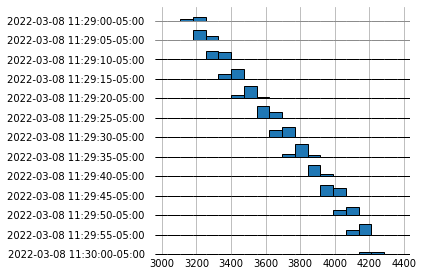

Parameter $2


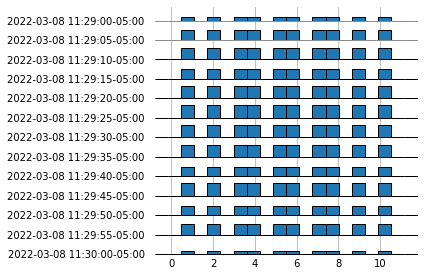

Parameter $3


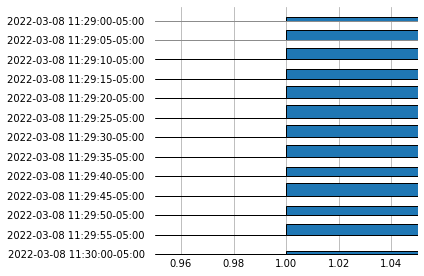

INSERT INTO history (H_C_D_ID, H_C_W_ID, H_C_ID, H_D_ID, H_W_ID, H_DATE, H_AMOUNT, H_DATA) VALUES ($1,$2,$3,$4,$5,$6,$7,$8)
Parameter $1


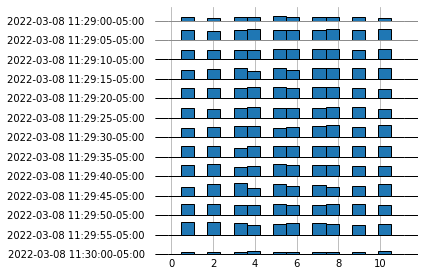

Parameter $2


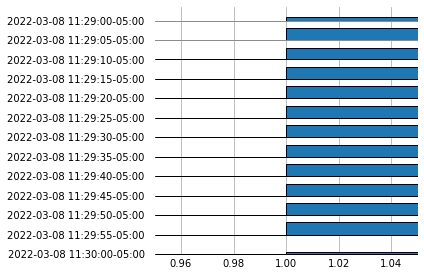

Parameter $3


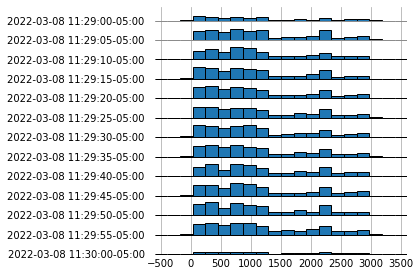

Parameter $4


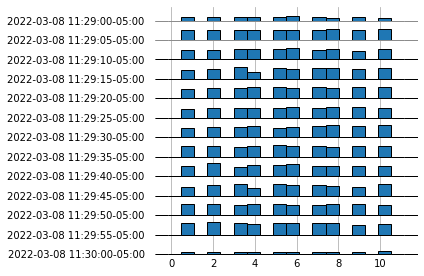

Parameter $5


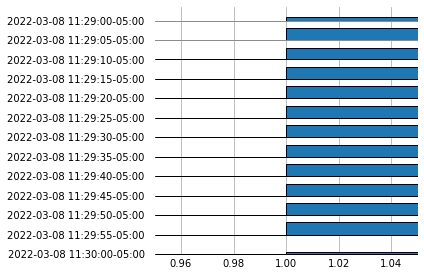

Parameter $6


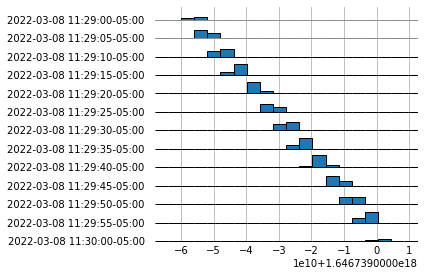

Parameter $7


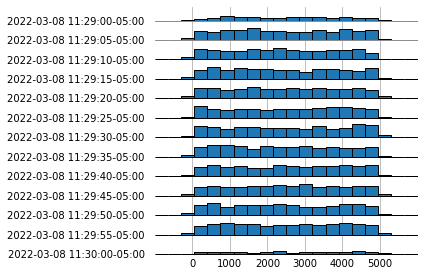

Parameter $8
INSERT INTO new_order (NO_O_ID, NO_D_ID, NO_W_ID) VALUES ( $1, $2, $3)
Parameter $1


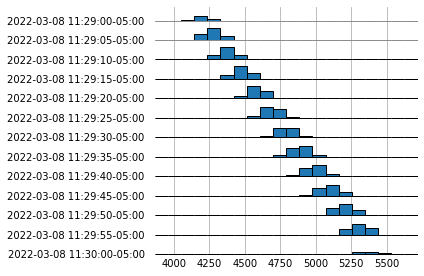

Parameter $2


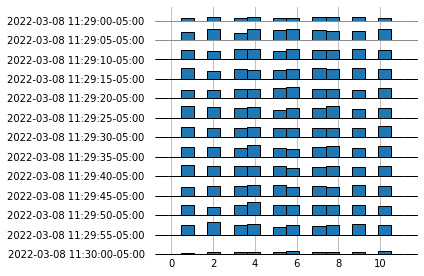

Parameter $3


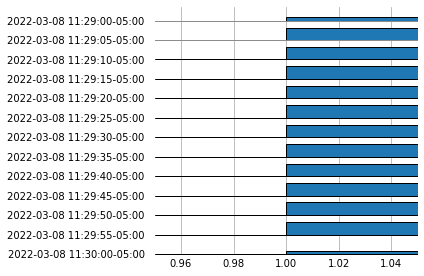

INSERT INTO oorder (O_ID, O_D_ID, O_W_ID, O_C_ID, O_ENTRY_D, O_OL_CNT, O_ALL_LOCAL) VALUES ($1, $2, $3, $4, $5, $6, $7)
Parameter $1


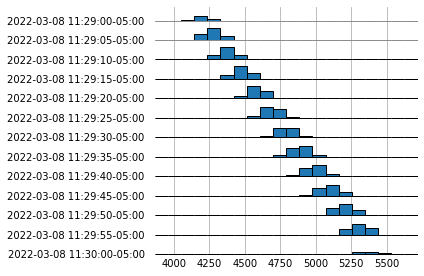

Parameter $2


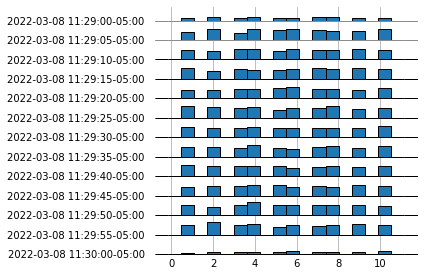

Parameter $3


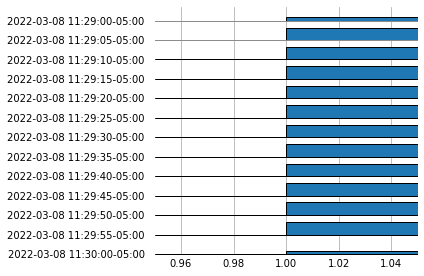

Parameter $4


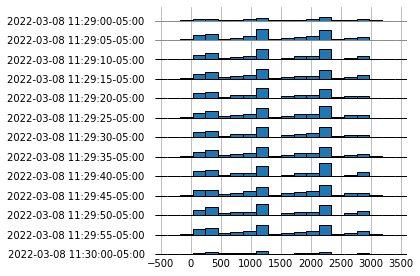

Parameter $5


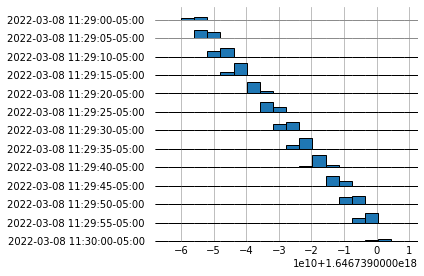

Parameter $6


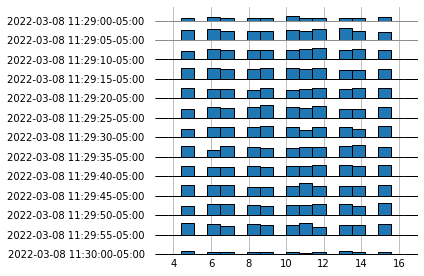

Parameter $7


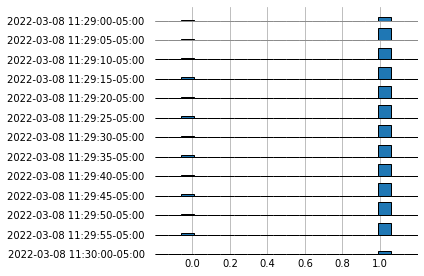

INSERT INTO order_line (OL_O_ID, OL_D_ID, OL_W_ID, OL_NUMBER, OL_I_ID, OL_SUPPLY_W_ID, OL_QUANTITY, OL_AMOUNT, OL_DIST_INFO) VALUES ($1,$2,$3,$4,$5,$6,$7,$8,$9)
Parameter $1


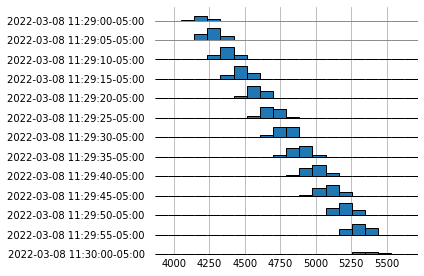

Parameter $2


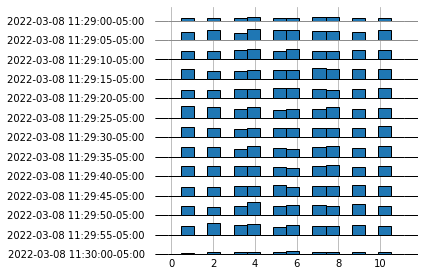

Parameter $3


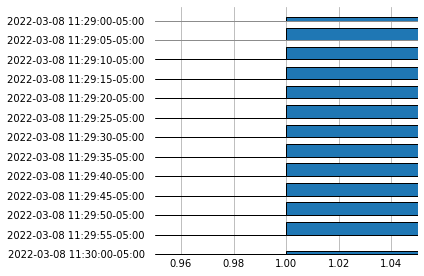

Parameter $4


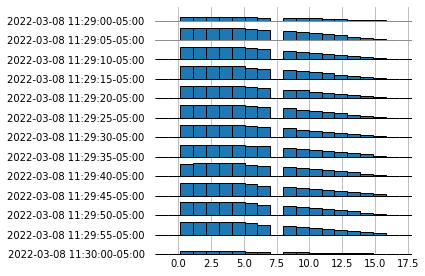

Parameter $5


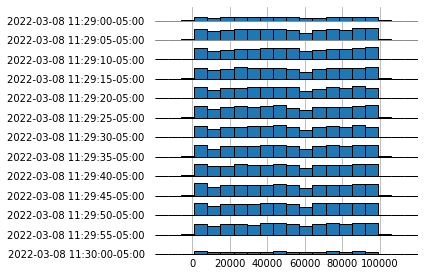

Parameter $6


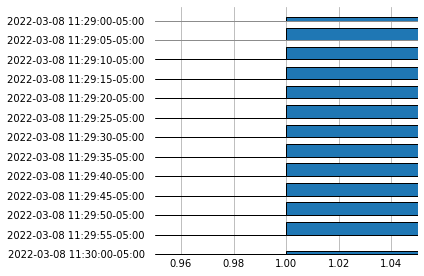

Parameter $7


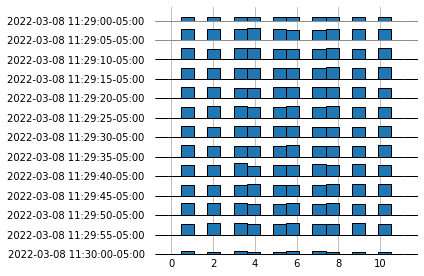

Parameter $8


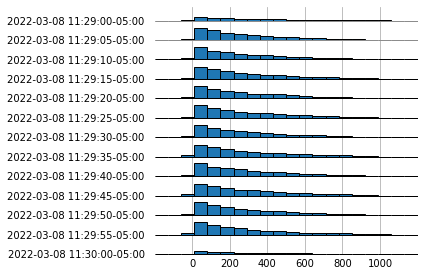

Parameter $9
ROLLBACK
SELECT * FROM pg_stat_archiver
SELECT * FROM pg_stat_bgwriter
SELECT * FROM pg_stat_database
SELECT * FROM pg_stat_database_conflicts
SELECT * FROM pg_stat_user_indexes
SELECT * FROM pg_stat_user_tables
SELECT * FROM pg_statio_user_indexes
SELECT * FROM pg_statio_user_tables
SELECT COUNT(DISTINCT (S_I_ID)) AS STOCK_COUNT FROM order_line, stock WHERE OL_W_ID = $1 AND OL_D_ID = $2 AND OL_O_ID < $3 AND OL_O_ID >= $4 AND S_W_ID = $5 AND S_I_ID = OL_I_ID AND S_QUANTITY < $6
Parameter $1


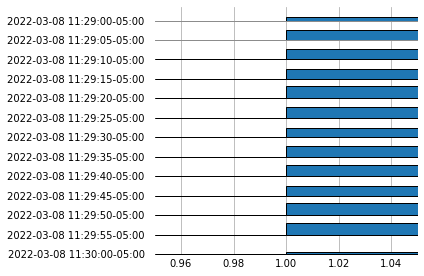

Parameter $2


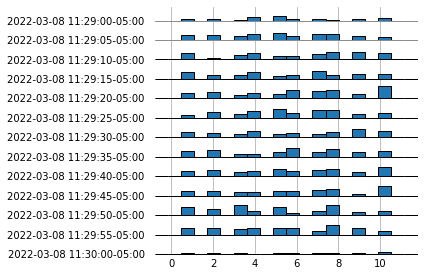

Parameter $3


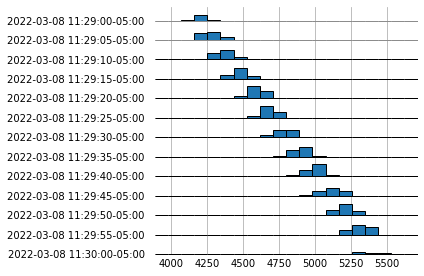

Parameter $4


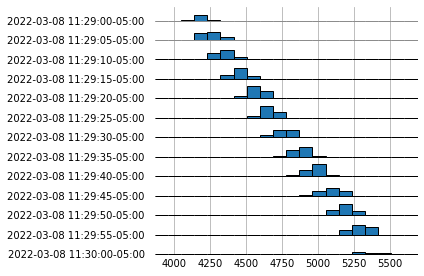

Parameter $5


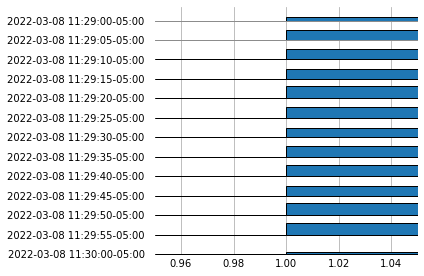

Parameter $6


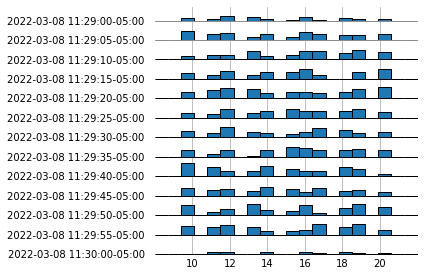

SELECT C_DATA FROM customer WHERE C_W_ID = $1 AND C_D_ID = $2 AND C_ID = $3
Parameter $1


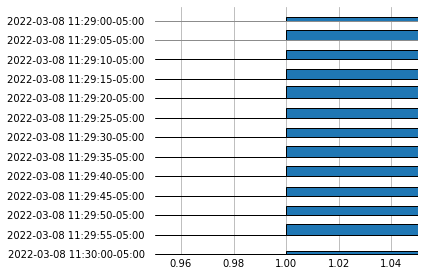

Parameter $2


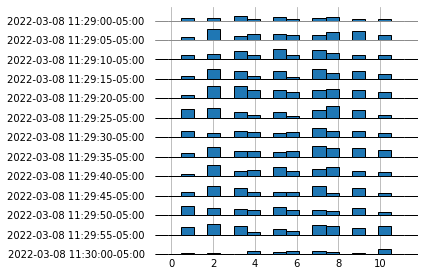

Parameter $3


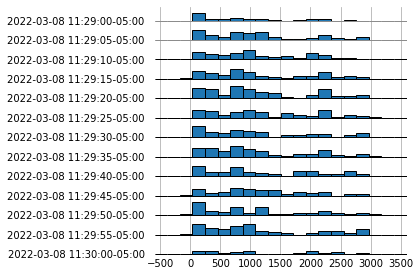

SELECT C_DISCOUNT, C_LAST, C_CREDIT FROM customer WHERE C_W_ID = $1 AND C_D_ID = $2 AND C_ID = $3
Parameter $1


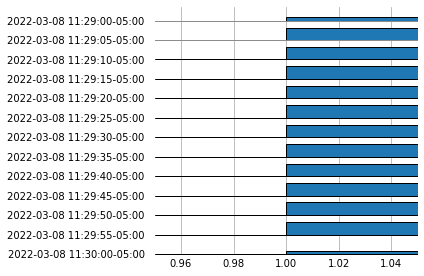

Parameter $2


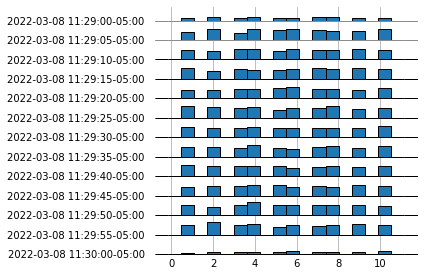

Parameter $3


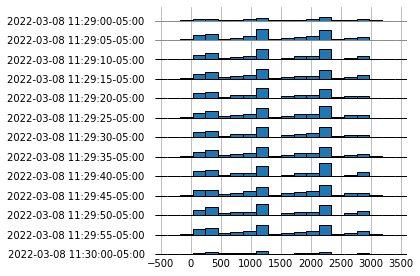

SELECT C_FIRST, C_MIDDLE, C_ID, C_STREET_1, C_STREET_2, C_CITY, C_STATE, C_ZIP, C_PHONE, C_CREDIT, C_CREDIT_LIM, C_DISCOUNT, C_BALANCE, C_YTD_PAYMENT, C_PAYMENT_CNT, C_SINCE FROM customer WHERE C_W_ID = $1 AND C_D_ID = $2 AND C_LAST = $3 ORDER BY C_FIRST
Parameter $1


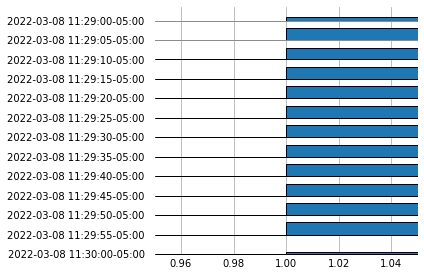

Parameter $2


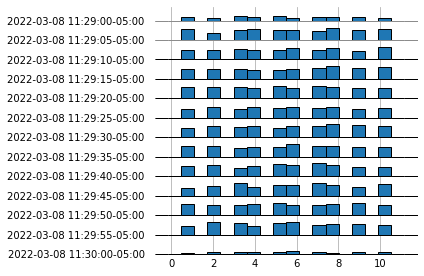

Parameter $3
SELECT C_FIRST, C_MIDDLE, C_LAST, C_STREET_1, C_STREET_2, C_CITY, C_STATE, C_ZIP, C_PHONE, C_CREDIT, C_CREDIT_LIM, C_DISCOUNT, C_BALANCE, C_YTD_PAYMENT, C_PAYMENT_CNT, C_SINCE FROM customer WHERE C_W_ID = $1 AND C_D_ID = $2 AND C_ID = $3
Parameter $1


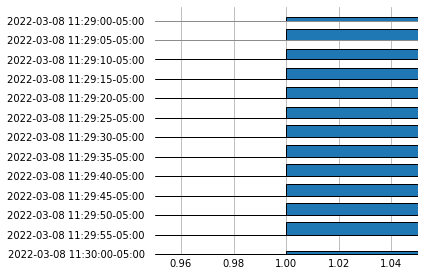

Parameter $2


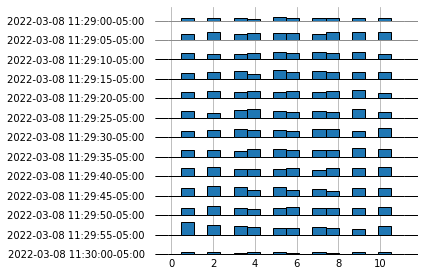

Parameter $3


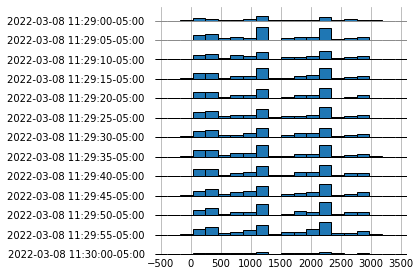

SELECT D_NEXT_O_ID FROM district WHERE D_W_ID = $1 AND D_ID = $2
Parameter $1


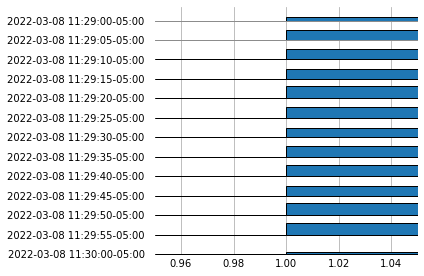

Parameter $2


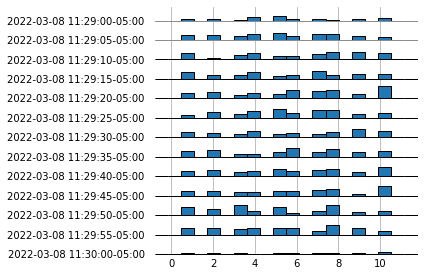

SELECT D_NEXT_O_ID, D_TAX FROM district WHERE D_W_ID = $1 AND D_ID = $2 FOR UPDATE
Parameter $1


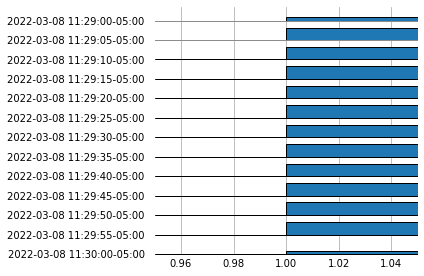

Parameter $2


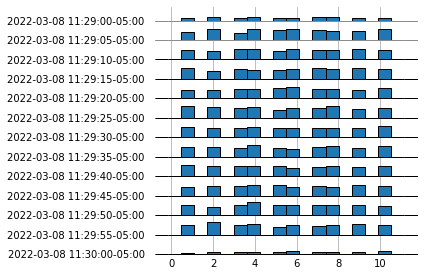

SELECT D_STREET_1, D_STREET_2, D_CITY, D_STATE, D_ZIP, D_NAME FROM district WHERE D_W_ID = $1 AND D_ID = $2
Parameter $1


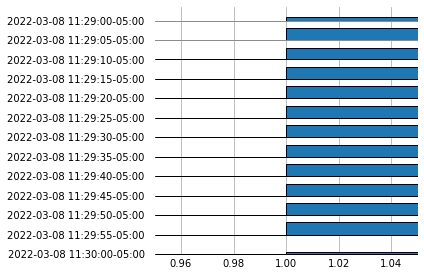

Parameter $2


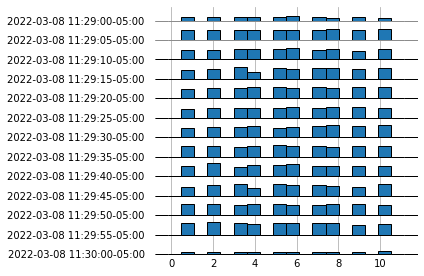

SELECT I_PRICE, I_NAME , I_DATA FROM item WHERE I_ID = $1
Parameter $1


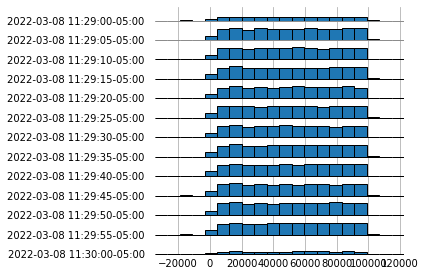

SELECT NO_O_ID FROM new_order WHERE NO_D_ID = $1 AND NO_W_ID = $2 ORDER BY NO_O_ID ASC LIMIT $3
Parameter $1


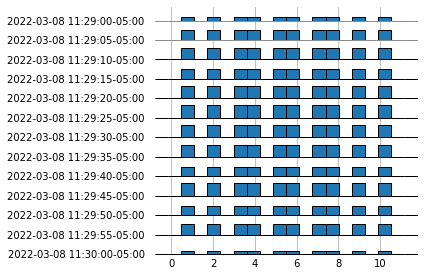

Parameter $2


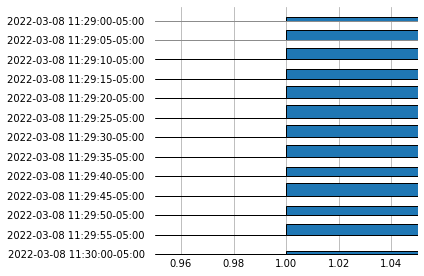

Parameter $3


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 21

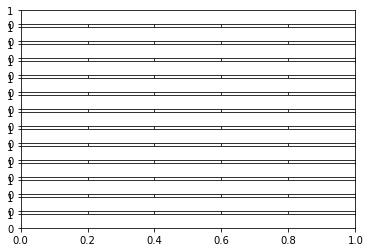

In [9]:
from pandas.api.types import is_datetime64_any_dtype

groups = [(qt, gdf) for qt, gdf in df.groupby('query_template')]

for query_template, gdf in groups:
    print(query_template)
    # display(gdf)

    if gdf['query_params'][0] == ():
        continue
    gdft = gdf['query_params'].apply(pd.Series)
    gdft = gdft.apply(lambda col: col.str.slice(1, -1))

    for col in gdft:
        try:
            gdft[col] = pd.to_datetime(gdft[col], errors='raise')
        except:
            try:
                gdft[col] = pd.to_numeric(gdft[col], errors='raise')
            except:
                pass
    gdft = gdft.convert_dtypes()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for col, dtype in zip(gdft, gdft.dtypes):
            print(f"Parameter ${col+1}")

            if dtype in ['object', 'string']:
                continue

            if is_datetime64_any_dtype(dtype):
                gdft[col] = pd.to_numeric(gdft[col])
            meow = gdft[col].to_frame()
            joypy.joyplot(meow.groupby(pd.Grouper(freq="5s")), hist=True, bins=20, overlap=0, grid=True)
            plt.show()

# Models

### Try some modelling on column 5 which has dist shift

,5
log_time,
2022-03-08 11:29:38.161000-05:00,1646738978161000000
2022-03-08 11:29:38.166000-05:00,1646738978165000000
2022-03-08 11:29:38.186000-05:00,1646738978186000000
2022-03-08 11:29:38.203000-05:00,1646738978203000000
2022-03-08 11:29:38.204000-05:00,1646738978204000000


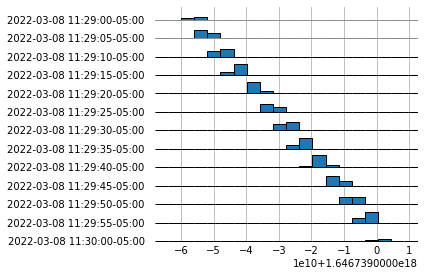

In [19]:
gdft_col5 = gdft[5].to_frame()
display(gdft_col5.head())
_ = joypy.joyplot(gdft_col5.groupby(pd.Grouper(freq="5s")), hist=True, bins=20, overlap=0, grid=True)

5                                \
                          left_boundary        q2        q4        q6   
log_time                                                                
2022-03-08 11:29:02-05:00     -1.750800 -1.745510 -1.739198 -1.728438   
2022-03-08 11:29:04-05:00     -1.712288 -1.691073 -1.665201 -1.642022   
2022-03-08 11:29:06-05:00     -1.592696 -1.570212 -1.543330 -1.522508   
2022-03-08 11:29:08-05:00     -1.473940 -1.451744 -1.428180 -1.407081   
2022-03-08 11:29:10-05:00     -1.354637 -1.331400 -1.308522 -1.283419   

                                                    
                                 q8 right_boundary  
log_time                                            
2022-03-08 11:29:02-05:00 -1.722908      -1.716837  
2022-03-08 11:29:04-05:00 -1.622401      -1.597365  
2022-03-08 11:29:06-05:00 -1.500963      -1.476556  
2022-03-08 11:29:08-05:00 -1.381293      -1.356738  
2022-03-08 11:29:10-05:00 -1.257956      -1.237130

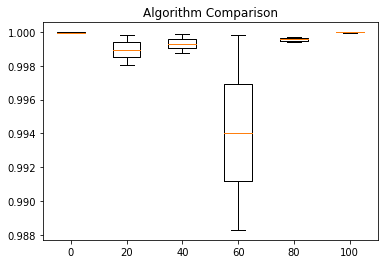

In [185]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



# Split data into 0.5s interval. Each interval (time step) is vectorized into 4 bins --> [20, 40, 60, 80] percentiles
def left_boundary(x):
  return x.quantile(0.01)
def q1(x):
  return x.quantile(0.1)
def q2(x):
  return x.quantile(0.2)
def q3(x):
  return x.quantile(0.3)
def q4(x):
  return x.quantile(0.4)
def q5(x):
  return x.quantile(0.5)
def q6(x):
  return x.quantile(0.6)
def q7(x):
  return x.quantile(0.7)
def q8(x):
  return x.quantile(0.8)
def q9(x):
  return x.quantile(0.9)
def right_boundary(x):
  return x.quantile(0.99)

# quantiles = [q1, q2, q3, q4, q5, q6, q7, q8, q9]
quantiles = [left_boundary, q2, q4, q6, q8, right_boundary]
quantile_names = [0, 20, 40, 60, 80, 100]

# Normalize data
mean = gdft_col5.mean().item()
std = gdft_col5.std().item()
gdft_col5_normal = (gdft_col5-mean)/std

# Group by time and get quantile data
time_series_df = gdft_col5_normal.groupby(pd.Grouper(freq="2s")).agg(quantiles)
display(time_series_df.head())

# Training sample: X= kth quantiles for past 10 seconds with 2s timestamp, y= kth quantile for the next 2 seconds
quantile_models = []
results = []
models = []
all_X, all_y, all_X_train, all_X_test, all_y_train, all_y_test = [],[],[],[],[],[]
for i, quantile in enumerate(quantiles):
  ########################
  # Gather training data #
  ########################
  lookback_window = int(10/2) # lookback interval / time step
  X, y = [], []
  for j in range(lookback_window, len(time_series_df)-1):
    X.append(time_series_df.iloc[j-lookback_window:j,i].to_numpy())
    y.append(time_series_df.iloc[j+1, i])
  X, y = np.array(X), np.array(y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

  all_X.append(X)
  all_y.append(y)
  all_X_train.append(X_train)
  all_X_test.append(X_test)
  all_y_train.append(y_train)
  all_y_test.append(y_test)
  # print(X_train.shape, X.shape, X_test.shape)
  # print(X[0], y[0])
  
  ##################
  # Model Training #
  ##################
  model = LinearRegression()
  model.fit(X_train, y_train)

  # TimeSeries Cross validation
  tscv = TimeSeriesSplit(n_splits=2)
  cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
  results.append(cv_results)
  # print('%s: %f (%f)' % ("LR", cv_results.mean(), cv_results.std()))

  models.append(model)
        
# Compare models for every quantile
plt.boxplot(results, labels=quantile_names)
plt.title('Algorithm Comparison')
plt.show()



{'uniform': {'loc': 1.646738943408e+18, 'scale': 46590000000.0}}


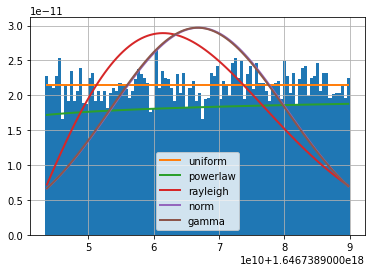

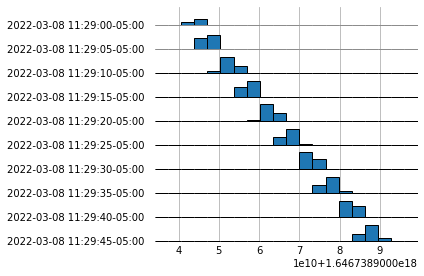

In [256]:
# Compare with dist fit
from fitter import Fitter, get_common_distributions, get_distributions

dist_fit_input = gdft_col5[gdft_col5.index <= pd.Timestamp("2022-03-08 11:29:50-05:00")] # Same amount of input data as X_train


 # Same amount of input data as X_train
f = Fitter(dist_fit_input,
           distributions=get_common_distributions())
f.fit()
f.summary()

dist_fit_model = f.get_best(method = 'sumsquare_error')
print(dist_fit_model)

# Draw 1000 times from dist_fit
dist_fit_samples = [stats.uniform(1.646738943408e+18, 46590000000.0).rvs() for _ in range(400)]

# _ = joypy.joyplot(dist_fit_input.groupby(pd.Grouper(freq="5s")), hist=True, bins=20, overlap=0, grid=True)


dist_fit has no notion of time. It sees that all values appear roughly equal amount of time so it chooses uniform distribution.

But we know in the next time period X=10 is more likely

In [241]:
from scipy import stats
# We have 4 models for 4 quantiles
quantile_predictions = []
for i, q_name in enumerate(quantile_names):
    quantile_predictions.append(model.predict(all_X_test[i]))
y_pred = np.array(list(zip(*quantile_predictions))) # Each row contains prediction for one test sample
y_pred = y_pred*std + mean

for y_row in y_pred:
    ql_val, q1_val, q2_val, q3_val, q4_val, qr_val = y_row
    # print(ql_val, q1_val, q2_val, q3_val, q4_val, qr_val)
    class Dist(stats.rv_continuous):
        def _cdf(self, x):
            conditions = [ql_val<=x<q1_val, q1_val<=x<q2_val, q2_val<=x<q3_val, q3_val<=x<q4_val, q4_val<=x<qr_val]
            choices = [0.2, 0.4, 0.6, 0.8, 1]
            return np.select(conditions, choices, default=0)
    dist = Dist(a=ql_val, b=qr_val,name="deterministic")
    
    # Generate 100 data points
    dist_shift_samples = [dist.rvs() for _ in range(400)]
    break


In [260]:
# START OF TEST SET Y 2022-03-08 11:29:52-05:00
real_dist = gdft_col5[(gdft_col5.index >= pd.to_datetime("2022-03-08 11:29:52-05:00")) & (gdft_col5.index < pd.to_datetime("2022-03-08 11:29:54-05:00"))] # Same amount of input data as X_train
print(len(real_dist))
# real_dist.hist()

# pd.DataFrame(dist_shift_samples).hist()


# pd.DataFrame(dist_fit_samples).hist()
# plt.plot()



398


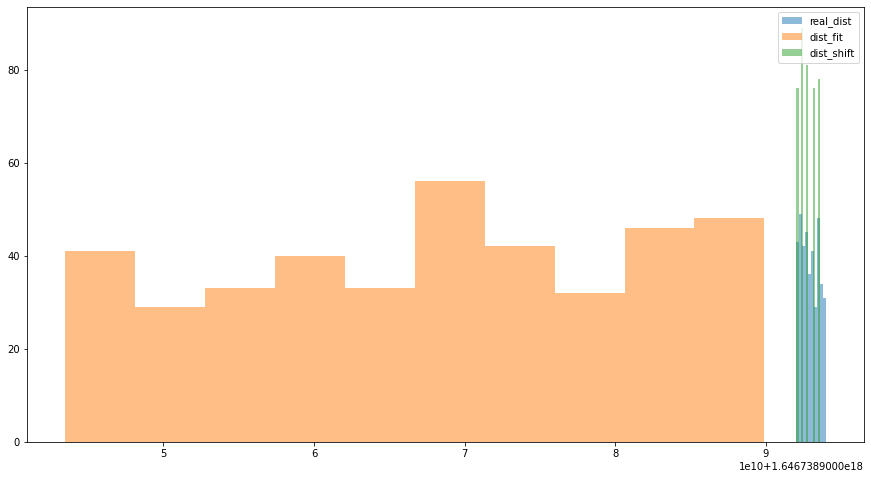

In [261]:
from matplotlib import pyplot
pyplot.figure(figsize=(15, 8))
pyplot.hist(real_dist.to_numpy(), alpha=0.5, label='real_dist')
pyplot.hist(dist_fit_samples, alpha=0.5, label='dist_fit')
pyplot.hist(dist_shift_samples, alpha=0.5, label='dist_shift')
pyplot.legend(loc='upper right')
pyplot.show()


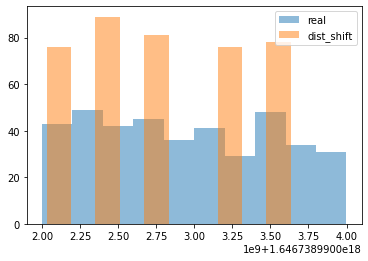

In [263]:
from matplotlib import pyplot
pyplot.figure(figsize=(6, 4))
pyplot.hist(real_dist.to_numpy(), alpha=0.5, label='real')
pyplot.hist(dist_shift_samples, alpha=0.5, label='dist_shift')
pyplot.legend(loc='upper right')
pyplot.show()

More bins should alleviate this problem. Also can choose uniformly in between bins

# Random Stuff

In [207]:
time_series_df

5                                \
                          left_boundary        q2        q4        q6   
log_time                                                                
2022-03-08 11:29:02-05:00     -1.750800 -1.745510 -1.739198 -1.728438   
2022-03-08 11:29:04-05:00     -1.712288 -1.691073 -1.665201 -1.642022   
2022-03-08 11:29:06-05:00     -1.592696 -1.570212 -1.543330 -1.522508   
2022-03-08 11:29:08-05:00     -1.473940 -1.451744 -1.428180 -1.407081   
2022-03-08 11:29:10-05:00     -1.354637 -1.331400 -1.308522 -1.283419   
2022-03-08 11:29:12-05:00     -1.232586 -1.209338 -1.183778 -1.161008   
2022-03-08 11:29:14-05:00     -1.112940 -1.087744 -1.065911 -1.041446   
2022-03-08 11:29:16-05:00     -0.991469 -0.967484 -0.942538 -0.917471   
2022-03-08 11:29:18-05:00     -0.873260 -0.851529 -0.830514 -0.806890   
2022-03-08 11:29:20-05:00     -0.752361 -0.730752 -0.705349 -0.682399   
2022-03-08 11:29:22-05:00     -0.633275 -0.610241 -0.583972 -0.563173   
2022-03-08 11:29:24-05:00     -0.512934 -0.489392 -0.467704 -0.442168   
2022-03-08 11:29:26-05:00     -0.391922 -0.370371 -0.345256 -0.324578   
2022-03-08 11:29:28-05:00     -0.271268 -0.243223 -0.220621 -0.198764   
2022-03-08 11:29:30-05:00     -0.150437 -0.126041 -0.103054 -0.078036   
2022-03-08 11:29:32-05:00     -0.032012 -0.009989  0.012817  0.036862   
2022-03-08 11:29:34-05:00      0.089407  0.110919  0.138102  0.161810   
2022-03-08 11:29:36-05:00      0.208874  0.230085  0.256678  0.279004   
2022-03-08 11:29:38-05:00      0.329724  0.353326  0.376252  0.399287   
2022-03-08 11:29:40-05:00      0.450288  0.474799  0.493434  0.519210   
2022-03-08 11:29:42-05:00      0.568937  0.590779  0.615701  0.639566   
2022-03-08 11:29:44-05:00      0.689740  0.712733  0.735564  0.757300   
2022-03-08 11:29:46-05:00      0.810910  0.829759  0.853323  0.879964   
2022-03-08 11:29:48-05:00      0.930706  0.957941  0.978668  1.001498   
2022-03-08 11:29:50-05:00      1.050280  1.069556  1.096462  1.125532   
2022-03-08 11:29:52-05:00      1.171106  1.190068  1.211144  1.234791   
2022-03-08 11:29:54-05:00      1.291282  1.314968  1.340913  1.361014   
2022-03-08 11:29:56-05:00      1.411691  1.432595  1.454644  1.482632   
2022-03-08 11:29:58-05:00      1.532730  1.557267  1.582766  1.607003   
2022-03-08 11:30:00-05:00      1.650669  1.661031  1.675590  1.687180   

                                                    
                                 q8 right_boundary  
log_time                                            
2022-03-08 11:29:02-05:00 -1.722908      -1.716837  
2022-03-08 11:29:04-05:00 -1.622401      -1.597365  
2022-03-08 11:29:06-05:00 -1.500963      -1.476556  
2022-03-08 11:29:08-05:00 -1.381293      -1.356738  
2022-03-08 11:29:10-05:00 -1.257956      -1.237130  
2022-03-08 11:29:12-05:00 -1.136590      -1.115982  
2022-03-08 11:29:14-05:00 -1.019192      -0.996731  
2022-03-08 11:29:16-05:00 -0.895591      -0.875574  
2022-03-08 11:29:18-05:00 -0.781679      -0.756524  
2022-03-08 11:29:20-05:00 -0.658017      -0.635115  
2022-03-08 11:29:22-05:00 -0.535702      -0.515120  
2022-03-08 11:29:24-05:00 -0.415948      -0.394584  
2022-03-08 11:29:26-05:00 -0.296121      -0.275195  
2022-03-08 11:29:28-05:00 -0.173938      -0.154237  
2022-03-08 11:29:30-05:00 -0.056612      -0.034059  
2022-03-08 11:29:32-05:00  0.063551       0.086066  
2022-03-08 11:29:34-05:00  0.185482       0.206646  
2022-03-08 11:29:36-05:00  0.302399       0.326970  
2022-03-08 11:29:38-05:00  0.426494       0.446836  
2022-03-08 11:29:40-05:00  0.539876       0.567090  
2022-03-08 11:29:42-05:00  0.660989       0.687678  
2022-03-08 11:29:44-05:00  0.782271       0.807080  
2022-03-08 11:29:46-05:00  0.905403       0.927787  
2022-03-08 11:29:48-05:00  1.028140       1.048789  
2022-03-08 11:29:50-05:00  1.144167       1.167270  
2022-03-08 11:29:52-05:00  1.261902       1.288449  
2022-03-08 11:29:54-05:00  1.384253       1.408567  
2022-03-08 11:29:56-05:00  1.504825   

In [91]:
quantiles = [q2, q4, q6, q8]

t = gdft_col5.groupby(pd.Grouper(freq="5s")).mean()
t = (t-t.mean())/t.std()
t

,5
log_time,
2022-03-08 11:29:00-05:00,-1.488199
2022-03-08 11:29:05-05:00,-1.315545
2022-03-08 11:29:10-05:00,-1.051658
2022-03-08 11:29:15-05:00,-0.789484
2022-03-08 11:29:20-05:00,-0.526659
2022-03-08 11:29:25-05:00,-0.257283
2022-03-08 11:29:30-05:00,0.004466
2022-03-08 11:29:35-05:00,0.264506
2022-03-08 11:29:40-05:00,0.529669


In [95]:
X = np.array([time_series_df.iloc[0:5, 3].to_numpy()])
n = preprocessing.Normalizer()
n.fit_transform(X)


array([[0.44721359, 0.44721359, 0.4472136 , 0.4472136 , 0.4472136 ]])

In [72]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [ ]:
# models = []
  # models.append(('LR', LinearRegression()))
  # models.append(('NN', MLPRegressor(verbose=True)))  #neural network
  # models.append(('GBR', GradientBoostingRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
  # models.append(('SVR', SVR(gamma='auto'))) # kernel = linear

In [138]:
import scipy.stats
import numpy as np
data = scipy.stats.norm.rvs(size=10, loc=0, scale=1.5, random_state=123)
hist = np.histogram(data, bins=10)
print(hist)
hist_dist = scipy.stats.rv_histogram(hist)

(array([1, 0, 1, 2, 2, 0, 1, 0, 1, 2]), array([-3.64001887, -3.0283015 , -2.41658413, -1.80486676, -1.1931494 ,
       -0.58143203,  0.03028534,  0.6420027 ,  1.25372007,  1.86543744,
        2.47715481]))
